In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits

## importamos un bosque
from sklearn.ensemble import RandomForestClassifier

## cross_val_score se encarga de ejecutar la validación cruzada, el resto son técnicas para hacerlo
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, LeaveOneOut

In [26]:
### se levanta dataset de flores y se define un bosque aleatorio
data = load_iris()
X, y = data.data, data.target

clf = RandomForestClassifier(n_estimators=50, random_state=42)

In [27]:
### n_splits es la cantidad de folds
cv_strategies = [
    ("KFold", KFold(n_splits=5, shuffle=True, random_state=42)),
    ("StratifiedKFold", StratifiedKFold(n_splits=5, shuffle=True, random_state=42)),
    ("Leave-One-Out", LeaveOneOut()),
]

results = {}
for name, cv in cv_strategies:
    scores = cross_val_score(clf, X, y, cv=cv)
    results[name] = scores

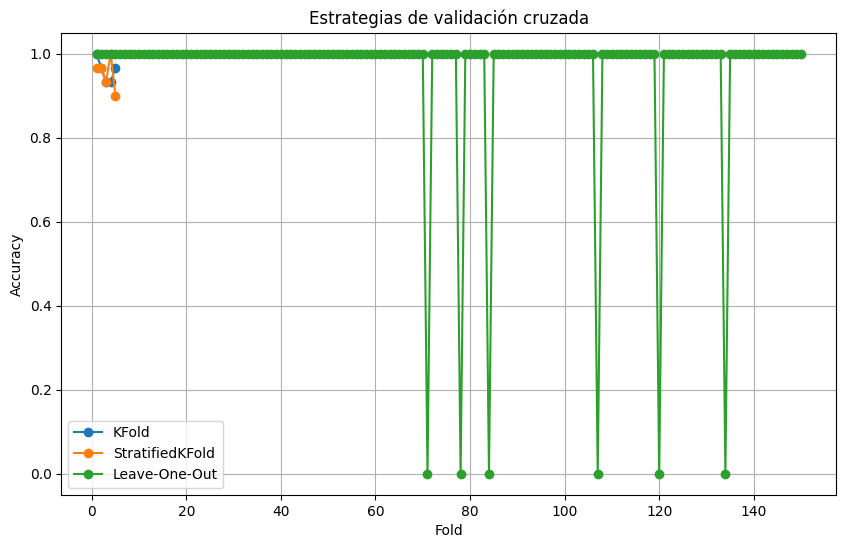

In [28]:
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label=name)

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Estrategias de validación cruzada")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
results['KFold']

array([1.        , 0.96666667, 0.93333333, 0.93333333, 0.96666667])

In [17]:
for strategy in cv_strategies:
  print('Media para la estrategia', strategy[0],':',results['KFold'].mean())
  print('Desvío estándar para la estrategia', strategy[0],':',results['KFold'].std())

Media para la estrategia KFold : 0.9600000000000002
Desvío estándar para la estrategia KFold : 0.024944382578492935
Media para la estrategia StratifiedKFold : 0.9600000000000002
Desvío estándar para la estrategia StratifiedKFold : 0.024944382578492935
Media para la estrategia Leave-One-Out : 0.9600000000000002
Desvío estándar para la estrategia Leave-One-Out : 0.024944382578492935
